In [17]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint

from collections import defaultdict
from typing import List
from tqdm import tqdm

from sklearn.metrics import confusion_matrix, accuracy_score
# 

In [18]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers  = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [19]:
csvs = []
csvs.append("/groups/icecube/cyan/factory/IceCubeTransformer/ImportLuc/Predictions/2025-02-20_16:02:33_TRUTH_3_VAL_epoch27.csv")
csvs.append("/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250224/model_20250221/predictions_epoch=037_val_loss=0.1634.csv")
csvs.append("/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250224/model_20250220/predictions_epoch=041_val_loss=0.1632.csv")


In [20]:
def get_confusion_matrix(df):
    cm = confusion_matrix(df["target_class"], df["pred_class"])
    return cm

In [21]:
def get_accuracy(df):
    acc = accuracy_score(df["target_class"], df["pred_class"])
    return acc

In [22]:
def plot_confusion_matrix(cm, title_key, isNormalised=True):
    """
    Plots a confusion matrix with both actual and normalised values.

    Args:
        cm (np.ndarray): Confusion matrix (square array).
        isNormalised (bool, optional): Whether to normalise the confusion matrix. Defaults to True.

    Returns:
        None
    """
    # Define class labels
    class_labels = [r"$\nu_{e}$", r"$\nu_{\mu}$", r"$\nu_{\tau}$"]

    # Compute normalised matrix (for display)
    cm_normalised = cm.astype("float") / cm.sum(axis=1, keepdims=True)

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(cm_normalised if isNormalised else cm, cmap="GnBu")

    # Add colorbar
    fig.colorbar(cax)

    # Set labels and ticks
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("True", fontsize=14)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("bottom")

    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels, fontsize=12)
    ax.set_yticklabels(class_labels, fontsize=12)
    
    ax.set_title(title_key)

    # Print numbers inside each tile (actual value + normalised)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            actual_value = int(cm[i, j])  # Convert to integer
            normalised_value = cm_normalised[i, j]  # Get normalised value
            ax.text(j, i, f"{actual_value}\n({normalised_value:.2f})",
                    ha="center", va="center",
                    color="white" if normalised_value > 0.7 else "black",
                    fontsize=12)

    # Show plot
    plt.show()


In [23]:
def run_cm(file, isNormalised = True):
    df = pd.read_csv(file)    
    file_name = os.path.basename(file)
    cm = get_confusion_matrix(df)
    acc = get_accuracy(df)
    print(f"Accuracy: {acc}")
    plot_confusion_matrix(cm, file_name, isNormalised)
    plt.show()

Accuracy: 0.5628754640566993


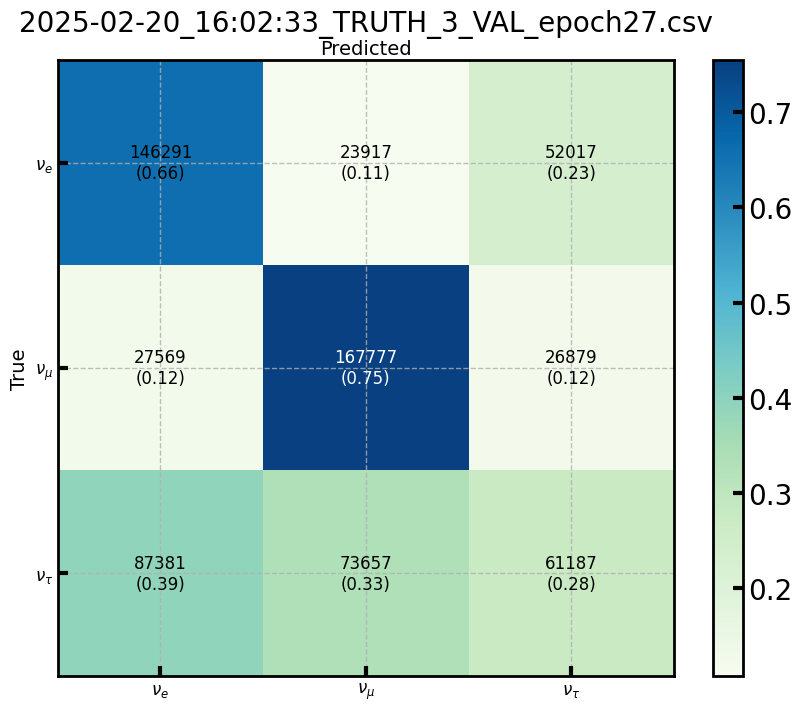

Accuracy: 0.33886926950958823


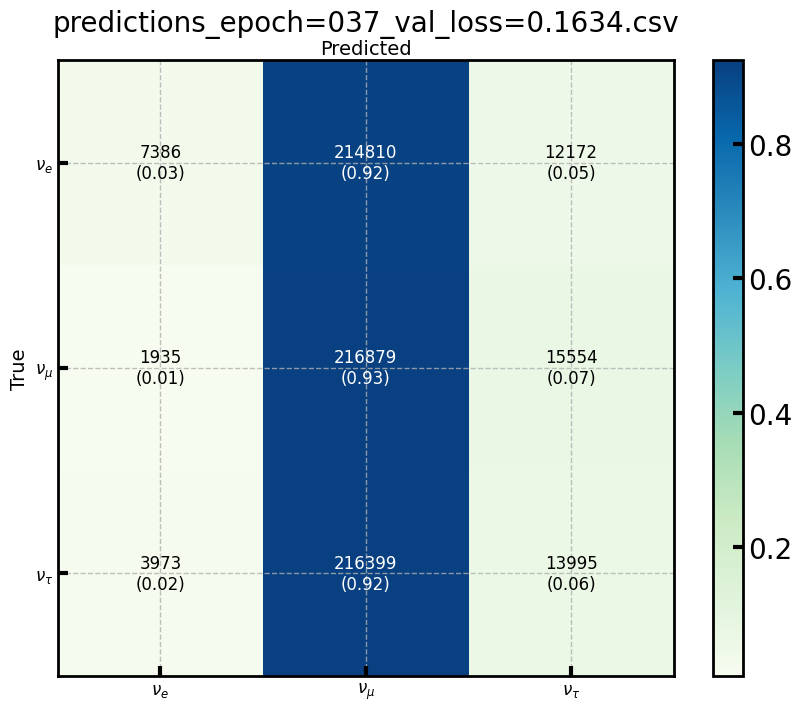

Accuracy: 0.3581210718770934


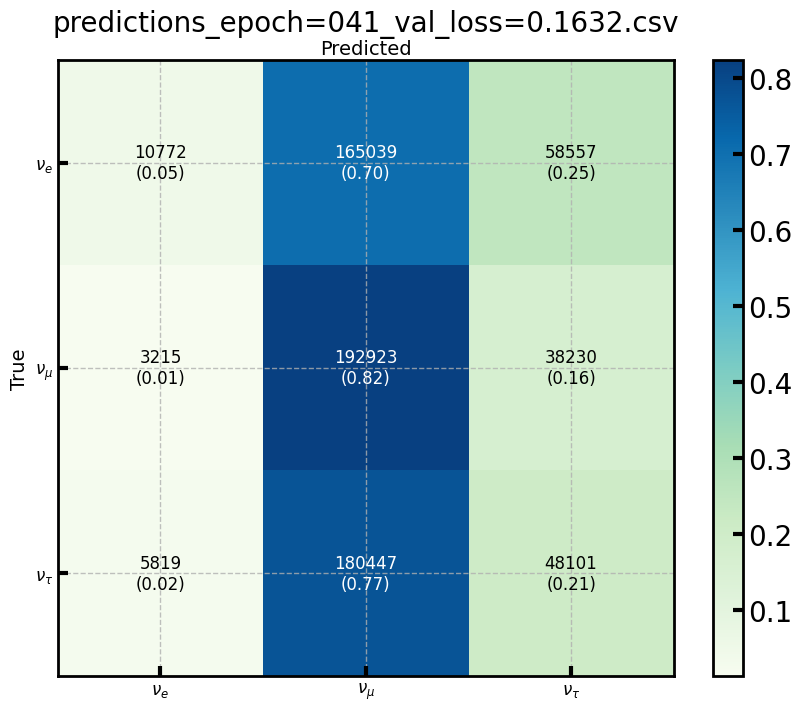

In [24]:
for csv in csvs:
    run_cm(csv, isNormalised = True)